# Assessing Missingness in Retail Food Item Weights  

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [2]:
%load_ext watermark

In [3]:
%watermark

Last updated: 2023-09-01T11:42:44.590590+01:00

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.12.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 154 Stepping 4, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [37]:
 %watermark --iversions

pandas    : 1.5.3
matplotlib: 3.7.1
plotly    : 5.15.0
seaborn   : 0.12.2
numpy     : 1.23.5



Retail Data

In [6]:
Sans = pd.read_csv(r"C:\Users\medekar\Desktop\Product_Weight_Project\Confidential_RetailDataset\Exported Data\RetailData.csv", index_col=0)
Sans.rename(columns={"Weight": "Weight Ind"}, inplace=True)
Sans.rename(columns={"EatwellSegment": "Eatwell Grouping"}, inplace=True)
Sans.rename(columns={"CriteraSet": "Subgrouping_L1"}, inplace=True)
Sans.rename(columns={"FoodGroupCategory": "SubgroupingFood_L2"}, inplace=True)

Renaming Eat Well Categories

In [7]:
# Replace the value in the DataFrame
Sans['Eatwell Grouping'] = Sans['Eatwell Grouping'].replace('Other (composite)', 'Composite foods')
Sans['Eatwell Grouping'] = Sans['Eatwell Grouping'].replace('dairy', 'Dairy and Dairy Alternatives')
Sans['Eatwell Grouping'] = Sans['Eatwell Grouping'].replace('other (water)', 'Water')
Sans['Eatwell Grouping'] = Sans['Eatwell Grouping'].replace('Other BWS', 'Alcoholic drinks')

                                    Exploring Rates of Missingness in Retail Data

In [8]:
# Find Counts of Missen Values
Missen = Sans.groupby('Eatwell Grouping')['Weight Ind'].value_counts().rename('Prod Count', inplace=True).copy() # value_counts count of unique values in a specific column 
Miss = pd.DataFrame(Missen).reset_index()

# Find Total Counts of All Categories 
Miss['Total Prod Count'] = Miss.groupby('Eatwell Grouping')['Prod Count'].transform('sum') #The transform() function is used to apply a function to each group of the grouped data.
#Miss

## Oils & Spreads had no missen weights

                                                Calculating % of missingness

Finding products without weight information

In [9]:
Zero = Miss[Miss['Weight Ind'] == 0]

Minor Cleaning

In [10]:
Zero['Eatwell Grouping'] = Zero['Eatwell Grouping'].str.capitalize()

C:\Users\medekar\AppData\Local\Temp\ipykernel_9448\3504478635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Zero['Eatwell Grouping'] = Zero['Eatwell Grouping'].str.capitalize()


Calculating Percentages of Missing weights at the Eat Well Classification level

In [11]:
Zero['%Missen'] = Zero['Prod Count'] / Zero['Total Prod Count'] * 100 

C:\Users\medekar\AppData\Local\Temp\ipykernel_9448\2680874287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Zero['%Missen'] = Zero['Prod Count'] / Zero['Total Prod Count'] * 100


                            Visualising Rates of Missingness by Eat Well Classifications

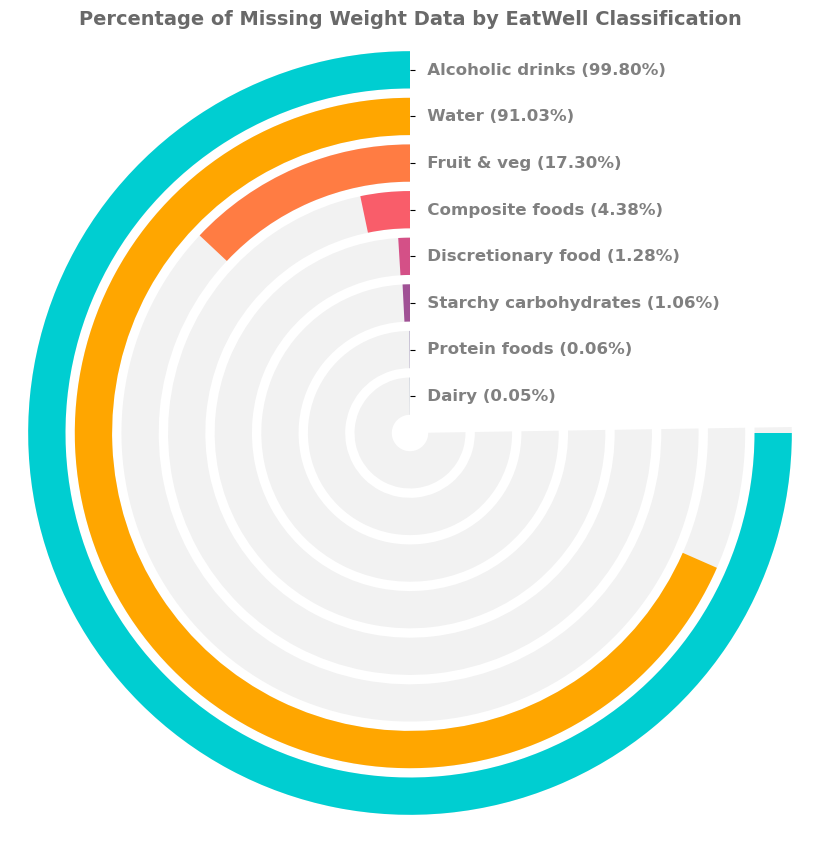

CPU times: total: 203 ms
Wall time: 205 ms


In [14]:
%%time

df = Zero.sort_values(by="%Missen", ascending=True)

# Get key properties for colours and labels
max_value_full_ring = max(df['%Missen'])
ring_colours = ['#2f4b7c', '#665191', '#a05195', '#d45087',
                '#f95d6a', '#ff7c43', '#ffa600', '#00CED1']
ring_labels = [f'   {x} ({v:.2f}%) ' for x, v in zip(list(df['Eatwell Grouping']), list(df['%Missen']))]

data_len = len(df)

# Begin creating the figure
fig = plt.figure(figsize=(10, 10), linewidth=20, facecolor='white', alpha=0.1)
rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring * 1.505 * np.pi / max_value_full_ring, color='grey', alpha=0.1)

# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7], labels=ring_labels, angle=0,
                    fontsize=12, fontweight='bold', color='grey', verticalalignment='center')

# Loop through each entry in the dataframe and create a colored ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df['%Missen'])[i] * 1.5 * np.pi / max_value_full_ring, color=ring_colours[i])


# Hide all grid elements
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=True, bottom=False, labelbottom=False, labelleft=True)

# Add a title
plt.title("Percentage of Missing Weight Data by EatWell Classification", fontsize=14, fontweight='bold', color = 'dimgray')

# Show the plot
plt.show()
#plt.savefig(r"C:\Users\medekar\Desktop\Product_Weight_Project\ScelfScale Output\EWClass.jpeg", bbox_inches='tight')

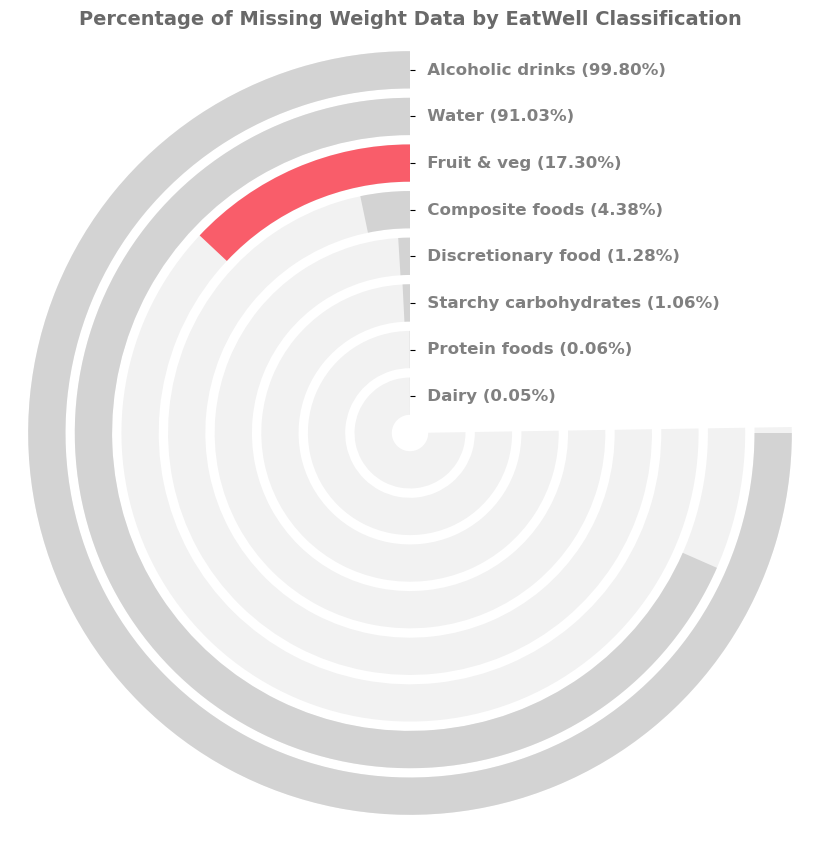

CPU times: total: 219 ms
Wall time: 215 ms


In [19]:
%%time

df = Zero.sort_values(by="%Missen", ascending=True)

# Get key properties for colours and labels
max_value_full_ring = max(df['%Missen'])

# Create a list of colors based on Eatwell Grouping
colors = ['#f95d6a' if group == 'Fruit & veg' else 'lightgrey' for group in df['Eatwell Grouping']]

# Get key properties for colours and labels
max_value_full_ring = max(df['%Missen'])
ring_labels = [f'   {x} ({v:.2f}%) ' for x, v in zip(list(df['Eatwell Grouping']), list(df['%Missen']))]

data_len = len(df)

# Begin creating the figure
fig = plt.figure(figsize=(10, 10), linewidth=20, facecolor='white', alpha=0.1)
rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring * 1.505 * np.pi / max_value_full_ring, color='grey', alpha=0.1)

# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7], labels=ring_labels, angle=0,
                    fontsize=12, fontweight='bold', color='grey', verticalalignment='center')

# Loop through each entry in the dataframe and create a colored ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df['%Missen'])[i] * 1.5 * np.pi / max_value_full_ring, color=colors[i])

# Hide all grid elements
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=True, bottom=False, labelbottom=False, labelleft=True)

# Add a title
plt.title("Percentage of Missing Weight Data by EatWell Classification", fontsize=14, fontweight='bold', color='dimgray')

# Show the plot
plt.show()
# plt.savefig(r"C:\Users\medekar\Desktop\Product_Weight_Project\ScelfScale Output\EWClass.jpeg", bbox_inches='tight')

## Visualising Hierarchy of Missingness over Varying Food Classifications

I want to be able to find what percentage of Food group category is missen by CriteraSet and then by Eat Well Classification. I think this would be the best way to visualise missingness across classifications

In [20]:
# Replace the value in the DataFrame
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('breads & morning goods', 'Bread, Breakfast & Bakery goods')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('Impulse Cakes, puddings & desserts ', 'Cakes, puddings & desserts')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('composite dishes', 'Ready & frozen meals,')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('dairy foods', 'dairy products')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('dairy beverages', 'dairy products')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('fruit & veg beverages', 'fruit juice & smoothies')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('Impulse sweet snacking', 'Sweet Snacks')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('Impulse savoury snacking', 'Savoury Snacks')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('RICE, NOODLES, PASTA, POTATO', 'grains, starches, carbohydrates')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('discretionary beverages', 'Soft drinks')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('Sweet sauces & spreads', 'Sauces & spreads')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('waters', 'water')
Sans['Subgrouping_L1'] = Sans['Subgrouping_L1'].replace('BWS', 'Beer,Wines&Spirits')


                                                Missingness by CriteraSet

In [21]:
pd.set_option('display.max_rows', None)

# Find Counts of Missen Values
critm = Sans.groupby(['Subgrouping_L1','Eatwell Grouping'])['Weight Ind'].value_counts().rename('Prod_CountCriSet', inplace=True).copy()
CriS = pd.DataFrame(critm).reset_index()
CriS

# Find Total Counts of products by FoodGroupCategory 
CriS['Total Prod Count CritSet'] = CriS.groupby('Subgrouping_L1')['Prod_CountCriSet'].transform('sum')
MisC = CriS.loc[CriS['Weight Ind'] == 0]
MisC['Eatwell Grouping'] = MisC['Eatwell Grouping'].str.capitalize()
MisC['Subgrouping_L1'] = MisC['Subgrouping_L1'].str.capitalize()
MisC

# Find Total Percentages of Missingness by FoodGroupCategory 
MisC['%Missen CritSet'] = MisC['Prod_CountCriSet'] / MisC['Total Prod Count CritSet'] * 100 
#MisC

C:\Users\medekar\AppData\Local\Temp\ipykernel_9448\2538511356.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MisC['Eatwell Grouping'] = MisC['Eatwell Grouping'].str.capitalize()
C:\Users\medekar\AppData\Local\Temp\ipykernel_9448\2538511356.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MisC['Subgrouping_L1'] = MisC['Subgrouping_L1'].str.capitalize()
C:\Users\medekar\AppData\Local\Temp\ipykernel_9448\2538511356.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

                                                Visualising by CriteraSet

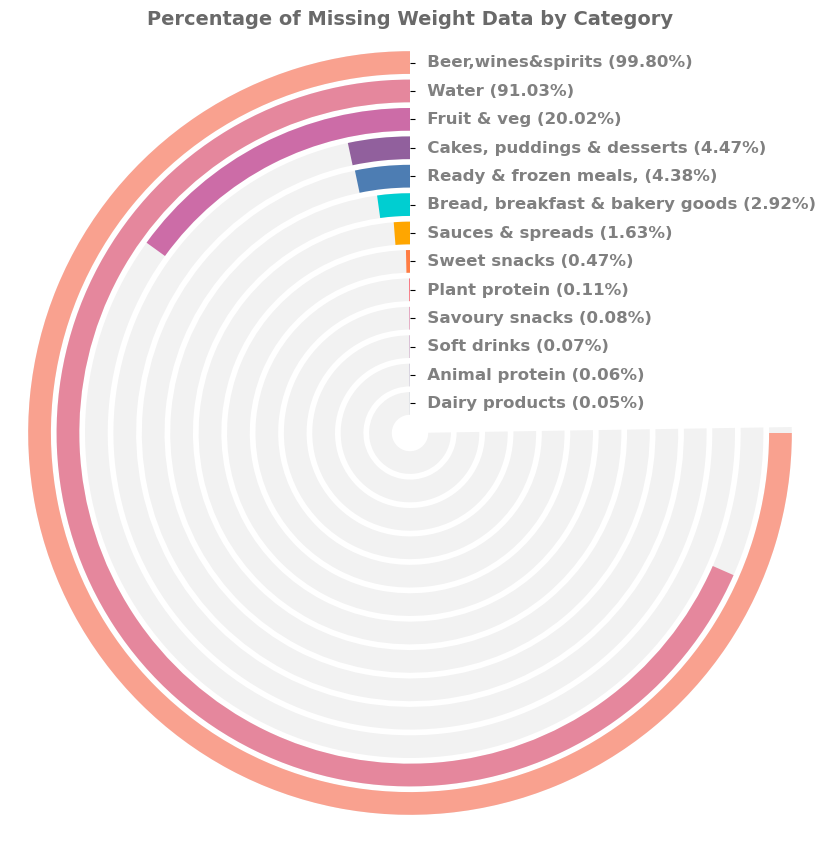

CPU times: total: 219 ms
Wall time: 256 ms


In [23]:
%%time
# Load data into pandas dataframe
df1 = MisC.sort_values(by="%Missen CritSet", ascending=True)

# Get key properties for colours and labels
max_value_full_ring = max(df1['%Missen CritSet'])
ring_colours1 = ['#2f4b7c', '#665191', '#a05195', '#d45087',  
                 '#f95d6a', '#ff7c43', '#ffa600', '#00CED1',
                 '#4d7db3', '#91609d', '#cc6ca7', '#e5879d', 
                 '#f9a18f']

ring_labels1 = [f'   {x} ({v:.2f}%) ' for x, v in zip(list(df1['Subgrouping_L1']), list(df1['%Missen CritSet']))]

data_len1 = len(df1)

# Begin creating the figure
fig = plt.figure(figsize=(10, 10), linewidth=20, facecolor='white', alpha=0.1)
rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey ring to create the background for each one
for i in range(data_len1):
    ax_polar_bg.barh(i, max_value_full_ring * 1.505 * np.pi / max_value_full_ring, color='grey', alpha=0.1)

# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12], labels=ring_labels1, angle=0,
                    fontsize=12, fontweight='bold', color='grey', verticalalignment='center')

# Loop through each entry in the dataframe and create a colored ring for each entry
for i in range(data_len1):
    ax_polar.barh(i, list(df1['%Missen CritSet'])[i] * 1.5 * np.pi / max_value_full_ring, color=ring_colours1[i])


# Hide all grid elements
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=True, bottom=False, labelbottom=False, labelleft=True)

# Add a title
plt.title("Percentage of Missing Weight Data by Category", fontsize=14, fontweight='bold', color='dimgray')

# Show the plot
plt.show()

#plt.savefig(r'C:\Users\medekar\Desktop\Product_Weight_Project\ScelfScale Output\EWClassMiss.png', dpi=300, bbox_inches='tight')

In [27]:
df1

,Subgrouping_L1,Eatwell Grouping,Weight Ind,Prod_CountCriSet,Total Prod Count CritSet,%Missen CritSet
28,Dairy products,Dairy,0,1,2052,0.048733
24,Animal protein,Protein foods,0,2,3343,0.059827
17,Soft drinks,Discretionary food,0,1,1481,0.067522
14,Savoury snacks,Starchy carbohydrates,0,1,1301,0.076864
35,Plant protein,Protein foods,0,1,896,0.111607
21,Sweet snacks,Discretionary food,0,13,2770,0.469314
11,Sauces & spreads,Discretionary food,0,9,551,1.633394
3,"Bread, breakfast & bakery goods",Starchy carbohydrates,0,35,1200,2.916667
8,"Ready & frozen meals,",Composite foods,0,62,1415,4.381625
5,"Cakes, puddings & desserts",Discretionary food,0,77,1722,4.471545


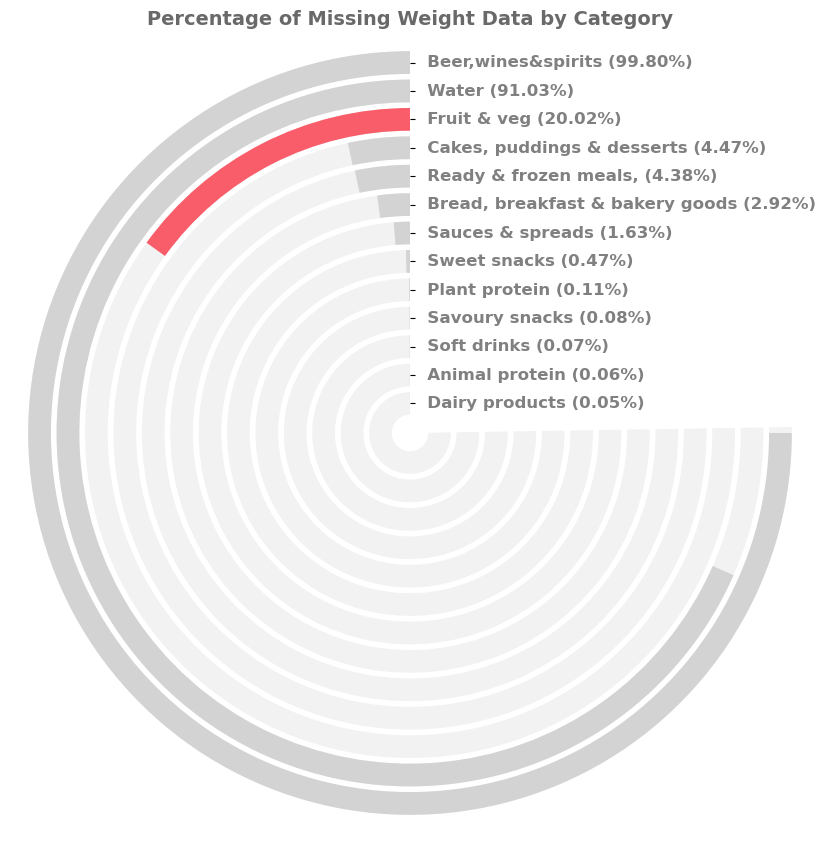

CPU times: total: 234 ms
Wall time: 266 ms


In [34]:
%%time

# Load data into pandas dataframe
df1 = MisC.sort_values(by="%Missen CritSet", ascending=True)

# Get key properties for colours and labels
max_value_full_ring1 = max(df1["%Missen CritSet"])

# Create a list of colors based on Subgrouping_L1
colors1 = ['#f95d6a' if group == 'Fruit & veg' else 'lightgrey' for group in df1['Subgrouping_L1']]

ring_labels1 = [f'   {x} ({v:.2f}%) ' for x, v in zip(list(df1['Subgrouping_L1']), list(df1['%Missen CritSet']))]

data_len1 = len(df1)

# Begin creating the figure
fig = plt.figure(figsize=(10, 10), linewidth=20, facecolor='white', alpha=0.1)
rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey ring to create the background for each one
for i in range(data_len1):
    ax_polar_bg.barh(i, max_value_full_ring1 * 1.505 * np.pi / max_value_full_ring1, color='grey', alpha=0.1)

# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=ring_labels1, angle=0,
                    fontsize=12, fontweight='bold', color='grey', verticalalignment='center')

# Loop through each entry in the dataframe and create a colored ring for each entry
for i in range(data_len1):
    ax_polar.barh(i, list(df1['%Missen CritSet'])[i] * 1.5 * np.pi / max_value_full_ring1, color=colors1[i])

# Hide all grid elements
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=True, bottom=False, labelbottom=False, labelleft=True)

# Add a title
plt.title("Percentage of Missing Weight Data by Category", fontsize=14, fontweight='bold', color='dimgray')

# Show the plot
plt.show()


# plt.savefig(r"C:\Users\medekar\Desktop\Product_Weight_Project\ScelfScale Output\EWClass.jpeg", bbox_inches='tight')

                                             Missingness by FoodGroupCategory

In [37]:
pd.set_option('display.max_rows', None)

# Find Counts of Missen Values
Sans['SubgroupingFood_L2'] = Sans['SubgroupingFood_L2'].str.capitalize()
FMissH = Sans.groupby(['SubgroupingFood_L2','Eatwell Grouping'])['Weight Ind'].value_counts().rename('Prod Count FGC', inplace=True).copy()
HMiss = pd.DataFrame(FMissH ).reset_index()
HMiss

# Find Total Counts of products by FoodGroupCategory 
HMiss['Total Prod CountbyFGC'] = HMiss.groupby('SubgroupingFood_L2')['Prod Count FGC'].transform('sum')
MisX = HMiss.loc[HMiss['Weight Ind'] == 0]
MisX['Eatwell Grouping'] = MisX['Eatwell Grouping'].str.capitalize()
#MisX['FoodGroupCategory'] = MisX['FoodGroupCategory'].str.capitalize()

# Find Total Percentages of Missingness by FoodGroupCategory 
MisX['%Missen_FGC'] = MisX['Prod Count FGC'] / MisX['Total Prod CountbyFGC'] * 100 
#MisX

C:\Users\medekar\AppData\Local\Temp\ipykernel_23148\2690784439.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MisX['Eatwell Grouping'] = MisX['Eatwell Grouping'].str.capitalize()
C:\Users\medekar\AppData\Local\Temp\ipykernel_23148\2690784439.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MisX['%Missen_FGC'] = MisX['Prod Count FGC'] / MisX['Total Prod CountbyFGC'] * 100


                                             Visualising by FoodGroupCategory

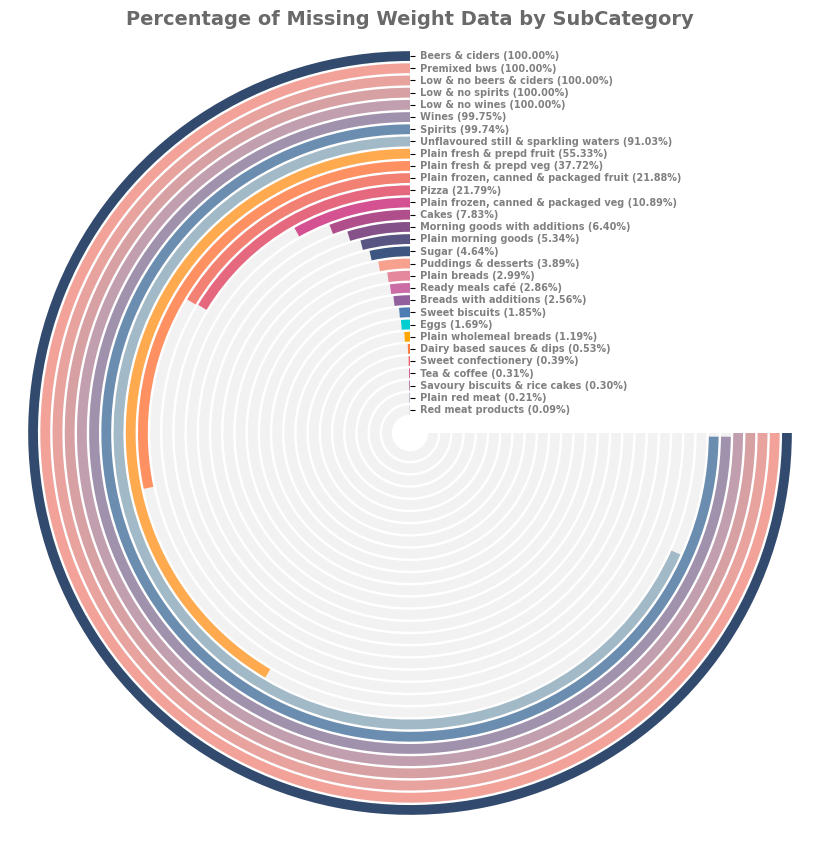

CPU times: total: 1.59 s
Wall time: 2.14 s


<Figure size 640x480 with 0 Axes>

In [39]:
%%time
# Load data into pandas dataframe
df2 = MisX.sort_values(by="%Missen_FGC", ascending=True)

# Get key properties for colours and labels
max_value_full_ring = max(df2['%Missen_FGC'])
ring_colours2 = ['#2f4b7c', '#665191', '#a05195', '#d45087',  
                 '#f95d6a', '#ff7c43', '#ffa600', '#00CED1',
                 '#4d7db3', '#91609d', '#cc6ca7', '#e5879d',  
                 '#f9a18f',

                 '#3d5681', '#585582', '#845289', '#b04e8c',
                 '#d45192', '#e5687f', '#f28174', '#ff9061',
                 '#ffaa4f', '#a2b9c7', '#6a8db0', '#a091ad',
                 '#c29faf', '#d7a1a4', '#e8a39f', '#f3a299',
                 
                 '#314a6e', '#504774', '#724680', '#9d447b',
                 '#c04185', '#d85988', '#eb6d7b', '#f37e6c', 
                 '#f48f5a', '#8fb3c3', '#5e7da4', '#8d7da0',
                 '#b784a2', '#ce8ba5', '#dd979f', '#e8a199']

ring_labels2 = [f'   {x} ({v:.2f}%) ' for x, v in zip(list(df2['SubgroupingFood_L2']), list(df2['%Missen_FGC']))]

data_len2 = len(df2)

# Begin creating the figure
fig = plt.figure(figsize=(10, 10), linewidth=20, facecolor='white', alpha=0.1)
rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey ring to create the background for each one
for i in range(data_len2):
    ax_polar_bg.barh(i, max_value_full_ring * 1.5 * np.pi / max_value_full_ring, color='grey', alpha=0.1)

# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], labels=ring_labels2, angle=0,
                    fontsize=7, fontweight='bold', color='grey', verticalalignment='center')

# Loop through each entry in the dataframe and create a colored ring for each entry
for i in range(data_len2):
    ax_polar.barh(i, list(df2['%Missen_FGC'])[i] * 1.5 * np.pi / max_value_full_ring, color=ring_colours2[i])


# Hide all grid elements
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=True, bottom=False, labelbottom=False, labelleft=True)

# Add a title
plt.title("Percentage of Missing Weight Data by SubCategory", fontsize=14, fontweight='bold', color='dimgray')

# Show the plot
plt.show()

plt.savefig(r'C:\Users\medekar\Desktop\Product_Weight_Project\ScelfScale Output\EWClassMiss.png', dpi=300, bbox_inches='tight')

                                                     
                                                      Join Dataframes

In [15]:
EWC = MisC.merge(Zero,on='Eatwell Grouping',how='left')
EWC.drop(['Prod_CountCriSet','Total Prod Count CritSet','Weight Ind_y','Prod Count','Total Prod Count'], axis=1, inplace=True)
#EWC

In [16]:
Full = MisX.merge(EWC, on='Eatwell Grouping',how='left')
Full.drop(['Weight Ind_x','Prod Count FGC','Total Prod CountbyFGC',], axis=1, inplace=True)
#Full

                                       Misseningness Across Classifications in a DF

In [17]:
Sans.columns

Index(['SKUDesc', 'SubgroupingFood_L2', 'Subgrouping_L1', 'Eatwell Grouping',
       'Category', 'Weight Ind', 'Unit'],
      dtype='object')

In [18]:
import pandas as pd

#Rearranging columns
FOrd = Full[['Eatwell Grouping', 'Subgrouping_L1', 'SubgroupingFood_L2', 'Weight Ind', '%Missen', '%Missen CritSet', '%Missen_FGC']]

FOrd.drop('Weight Ind', axis=1, inplace=True)

#Setting values to 3 decimal places
FOrd['%Missen'] = FOrd['%Missen'].apply(lambda x: f'{round(x, 3)}')
FOrd['%Missen CritSet'] = FOrd['%Missen CritSet'].apply(lambda x: f'{round(x, 3)}')
FOrd['%Missen_FGC'] = FOrd['%Missen_FGC'].apply(lambda x: f'{round(x, 3)}')

FOrd.set_index(['Eatwell Grouping', 'Subgrouping_L1', 'SubgroupingFood_L2'], inplace=True)
FOrd.groupby(level=['Eatwell Grouping', 'Subgrouping_L1', 'SubgroupingFood_L2']).mean()
#FOrd.sort_values('%Missen')

C:\Users\medekar\AppData\Local\Temp\ipykernel_23148\2926602575.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FOrd.drop('Weight Ind', axis=1, inplace=True)
C:\Users\medekar\AppData\Local\Temp\ipykernel_23148\2926602575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FOrd['%Missen'] = FOrd['%Missen'].apply(lambda x: f'{round(x, 3)}')
C:\Users\medekar\AppData\Local\Temp\ipykernel_23148\2926602575.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

%Missen  \
Eatwell Grouping      Subgrouping_L1                  SubgroupingFood_L2                               
Alcoholic drinks      Beer,wines&spirits              Beers & ciders                          99.801   
                                                      Low & no beers & ciders                 99.801   
                                                      Low & no spirits                        99.801   
                                                      Low & no wines                          99.801   
                                                      Premixed bws                            99.801   
                                                      Spirits                                 99.801   
                                                      Wines                                   99.801   
Composite foods       Ready & frozen meals,           Pizza                                    4.382   
                                                      Ready meals café                         4.382   
Dairy                 Dairy products                  Dairy based sauces & dips                0.051   
Discretionary food    Cakes, puddings & desserts      Cakes                                    1.279   
                                                      Puddings & desserts                      1.279   
                                                      Sugar                                    1.279   
                                                      Sweet biscuits                           1.279   
                                                      Sweet confectionery                      1.279   
                                                      Tea & coffee                             1.279   
                      Sauces & spreads                Cakes                                    1.279   
                                                      Puddings & desserts                      1.279   
                                                      Sugar                                    1.279   
                                                      Sweet biscuits                           1.279   
                                                      Sweet confectionery                      1.279   
                                                      Tea & coffee                             1.279   
                      Soft drinks                     Cakes                                    1.279   
                                                      Puddings & desserts                      1.279   
                                                      Sugar                                    1.279   
                                                      Sweet biscuits                           1.279   
                                                      Sweet confectionery                      1.279   
                                                      Tea & coffee                             1.279   
                      Sweet snacks                    Cakes                                    1.279   
                                                      Puddings & desserts                      1.279   
                                                      Sugar                                    1.279   
                                                      Sweet biscuits                           1.279   
                                                      Sweet confectionery                      1.279   
                                                      Tea & coffee                             1.279   
Fruit & veg           Fruit & veg                     Plain fresh & prepd fruit               17.297   
                                                      Plain fresh & prepd veg                 17.297   
                                                      Plain frozen, canned & packaged fruit   17.297   
                                     

                                                    NEXT NOTEBOOK